In [66]:
from PIL import Image
from os import path as op
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from decimal import Decimal
%matplotlib inline

In [67]:
webpage_dir = op.expanduser("~/Documents/jekyll/mb-webpage")
im_path = op.join(webpage_dir, "img/bannert_research.jpg")
cov_mat = np.array([[200000, 0], [0, 600000]])
out_path = op.join(webpage_dir,
                   "img/bannert_research_%iby%i.jpg" % (cov_mat[0,0], cov_mat[1,1]))

In [68]:
im = Image.open(im_path)

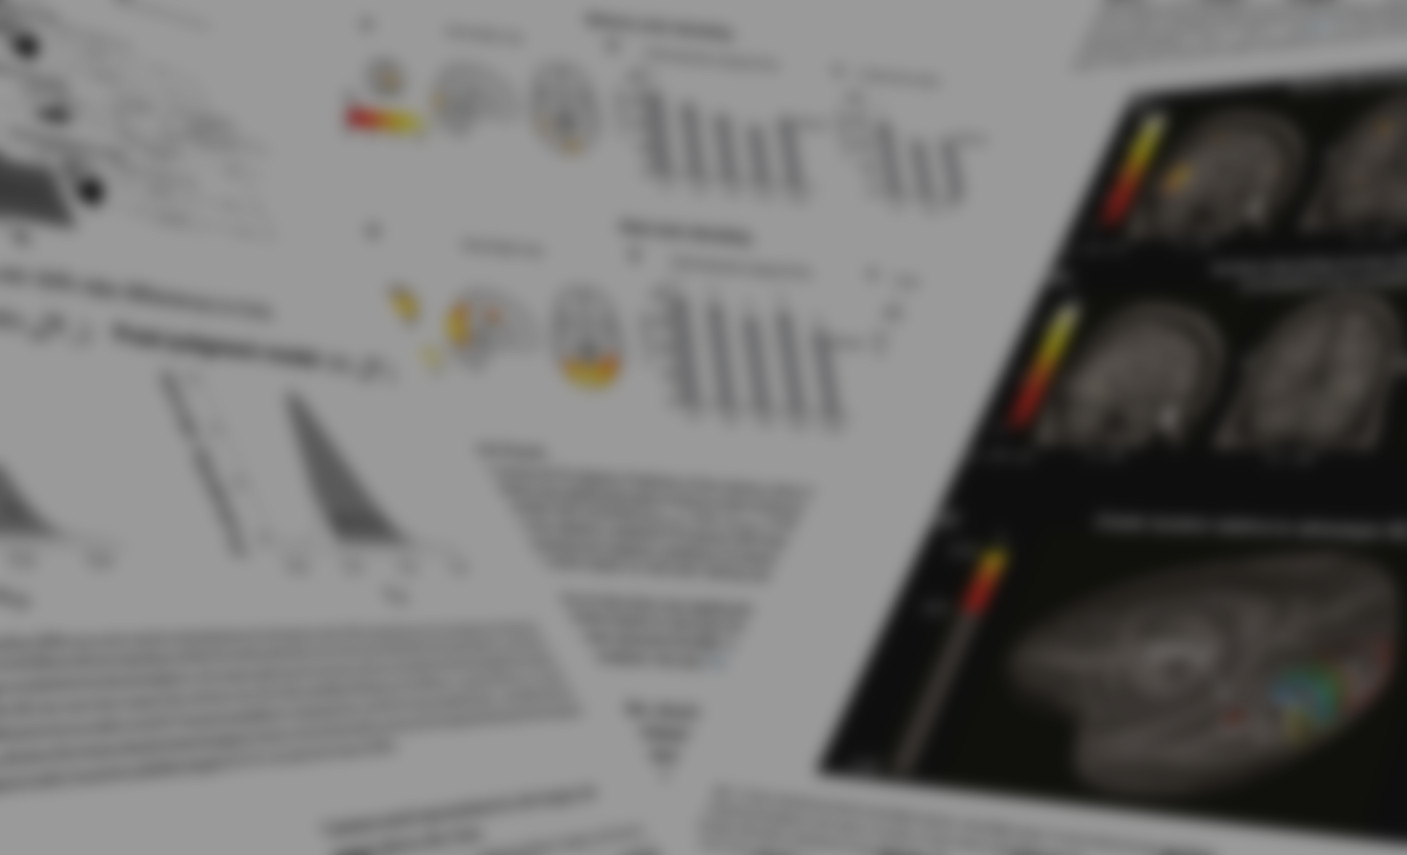

In [69]:
im

In [70]:
im_hsv = im.convert("HSV")

In [71]:
H, S, V = im_hsv.split()

In [72]:
V2d = np.reshape(V.getdata(), newshape=im.size[::-1])

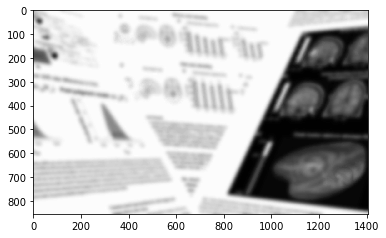

In [73]:
plt.imshow(V2d, cmap="gray")

In [74]:
ctr_x = im.size[1] / 2.

In [75]:
ctr_y = im.size[0] / 2.

In [76]:
x, y = np.mgrid[0:im.size[1]:1, 0:im.size[0]:1]

In [77]:
env = multivariate_normal.pdf(np.dstack((x, y)), mean=(ctr_x, ctr_y), cov=cov_mat)
env = env / env.max()

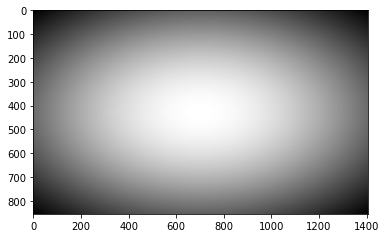

In [78]:
plt.imshow(env, cmap="gray")

In [79]:
V2d_env = V2d * env

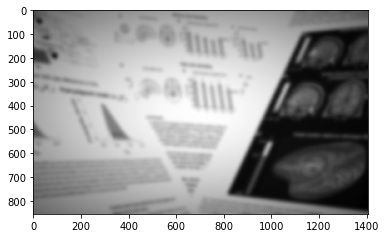

In [80]:
plt.imshow(V2d_env, cmap="gray")

In [81]:
V_env = Image.new("L", im.size)
V_env.putdata(V2d_env.astype(int).flatten())

In [82]:
im_env = Image.merge(mode="HSV", bands=(H, S, V_env)).convert("RGB")

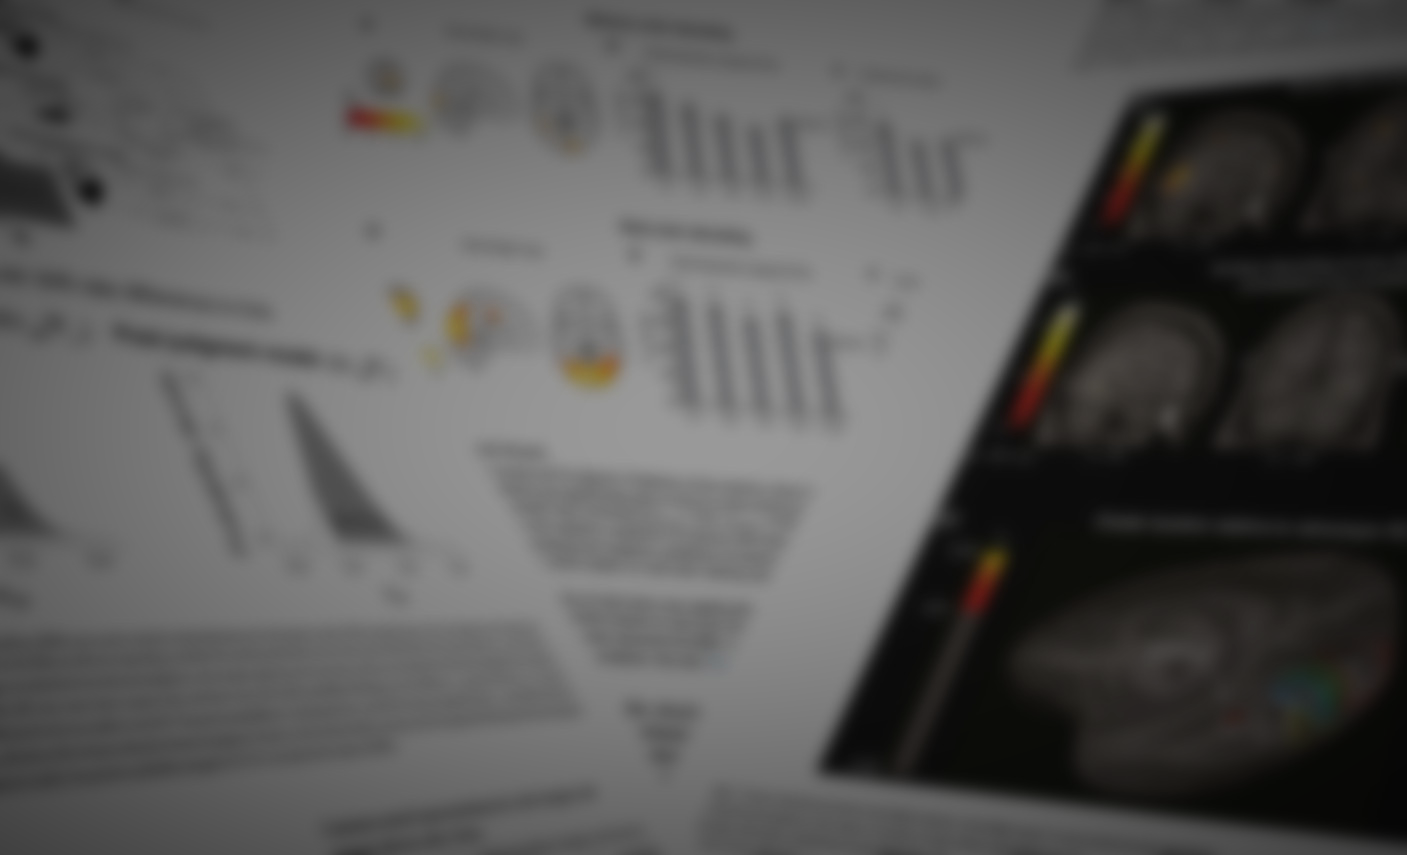

In [83]:
im_env

In [84]:
im_env.save(out_path)